<a href="https://colab.research.google.com/github/EricoCoutoJr/Processamento-Big-Data/blob/main/Pr%C3%A1tica_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Processamento-Big-Data
##Projeto etapas do processamento do BigData (modelo reduzido)
___________________________



In [1]:
import pandas as pd
import numpy as np
import plotly.express as px  #Criação de graficos dinâmnicos
import plotly.graph_objects as go #Para criação e concatenização de graficos
from sklearn.preprocessing import StandardScaler # para relizar a padronização dos dados
from sklearn.preprocessing import MinMaxScaler # outra forma de padronização de dados
from sklearn.cluster import KMeans

In [8]:
#Abrindo o arquivo de dados
drive = '/content/dataset/'
dados_cliente = pd.read_excel(drive+'amostra_dados_clientes.xlsx')
estados_brasileiros = pd.read_csv(drive+'estados_brasileiros.csv', sep=';', encoding='latin-1')
idade_clientes = pd.read_csv(drive+'idade_clientes.csv', sep=';')


## Manipuilando o Dataframe dos estados brasileiros

In [4]:
# Verificando o formato do dataframe
print('Dimensões do Dataset',
    '\nVariáveis: ',estados_brasileiros.shape[1], "\n"
      'Entradas: ', estados_brasileiros.shape[0])

Dimensões do Dataset 
Variáveis:  4 
Entradas:  27


In [5]:
estados_brasileiros.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,NaN
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,NaN
4,5,Bahia,ba,Brasil


In [6]:
# Verificando e contando os dados Nulos (NaN)
estados_brasileiros.isnull().sum()


id_estado       0
estado          0
sigla_estado    0
pais            5
dtype: int64

In [7]:
# Preenchendo valores nulos por Brasil na coluna País
# A coluna pais poderia ter sido removida já que o dataset é de estados brasileiros

estados_brasileiros['pais'].fillna(value = 'Brasil', inplace=True)

In [8]:
estados_brasileiros.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


## Manipulando os dados do dataset idade_clientes.csv


In [9]:
# Verificando as dimensões do dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',idade_clientes.shape[1], "\n"
      'Entradas: ', idade_clientes.shape[0])

Dimensões do Dataset 
Variáveis:  2 
Entradas:  547


In [10]:
idade_clientes.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


In [11]:
idade_clientes.isnull().sum()

id_cliente    0
idade         0
dtype: int64

In [12]:
idade_clientes[['idade']].describe()

,idade
count,547.000000
mean,42.791590
std,15.160209
min,16.000000
25%,30.000000
50%,42.000000
75%,55.000000
max,70.000000


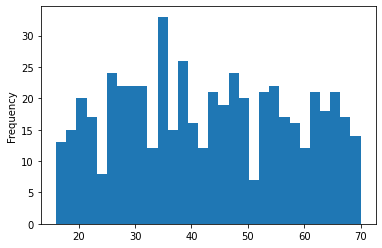

In [13]:

ax = idade_clientes['idade'].plot.hist(bins = 30)

## Manipulando os dados do dataset amostra_dados_cliente.csv

In [14]:
# Verificando as dimensões do dataset
print('Dimensões do Dataset',
    '\nVariáveis: ',dados_cliente.shape[1], "\n"
      'Entradas: ', dados_cliente.shape[0])

Dimensões do Dataset 
Variáveis:  5 
Entradas:  225


In [15]:
dados_cliente.head(10)

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
5,6,198.0,227,Masculino,8
6,7,114.0,131,Masculino,26
7,8,145.0,176,Feminino,25
8,9,191.0,223,Feminino,16
9,10,186.0,221,Masculino,6


In [24]:
# Associando idade ao dataframes
resultado = pd.concat([dados_cliente, idade_clientes['idade']], axis = 1, join = 'inner')
dados_cliente = resultado
dados_cliente.head()

,id_cliente,peso,colesterol,genero,id_estado,idade,idade,idade
0,1,102.0,111,Masculino,23,17,17,17
1,2,115.0,135,Masculino,7,28,28,28
2,3,115.0,136,Masculino,4,62,62,62
3,4,140.0,167,Feminino,24,55,55,55
4,5,130.0,158,Masculino,26,44,44,44


In [19]:
# Verificando a existência de dados ausentes
dados_cliente.isnull().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
idade         0
dtype: int64

In [20]:
# Removendo as linhas (registros) com dados ausentes
dados_cliente.dropna(subset=['peso'], inplace=True)

In [21]:
# Checking 
dados_cliente.isnull().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
idade         0
dtype: int64

In [22]:
dados_cliente[['peso','colesterol','idade']].describe()

,peso,colesterol,idade
count,222.000000,222.000000,222.000000
mean,142.315315,168.612613,42.936937
std,31.198817,39.654999,15.347722
min,95.000000,102.000000,16.000000
25%,115.000000,135.000000,30.000000
50%,138.500000,167.500000,43.000000
75%,170.000000,206.250000,55.000000
max,203.000000,235.000000,70.000000


# Realizando o agrupamento pelo peso e colesterol

In [28]:
# criando variável X com as colunas peso e colesterol
X_peso_colesterol = pd.DataFrame(dados_cliente.iloc[:,[1,2]].values)
X_peso_colesterol[:10]
cols = dados_cliente.iloc[:, [1,2]].columns

# Normalizando os dados
Como os dados estão em uma escala muito diferente, precisamos normalizar os dados colocando no mesmo padrão e na mesma escala. Como o Kmeans realiza os calculos baseado na distancia, devemos padronizar os dados afim de que um atributo não seja considerado mais importanet do que o outro.

In [57]:
# O StandardScaler transforma os dados de forma a obter média 0 e desvio padrão 1.
normalizar_dados = StandardScaler()
X_peso_colesterol = normalizar_dados.fit_transform(X_peso_colesterol)
#X_peso_colesterol.columns = cols
X_peso_colesterol[:10]

array([[-1.29512678, -1.45612943],
       [-0.87750266, -0.84954166],
       [-0.87750266, -0.82426717],
       [-0.07437935, -0.04075796],
       [-0.39562867, -0.26822838],
       [ 1.78886673,  1.47571146],
       [-0.90962759, -0.95063962],
       [ 0.08624531,  0.18671245],
       [ 1.5639922 ,  1.3746135 ],
       [ 1.40336754,  1.32406452]])

# Calculando o número de Cluster
Para calcular o número de cluster vamos utilizar o metodo do cotovelo 

WCSS é a soma da distância quadrada entre cada ponto e o centróide em um cluster

In [45]:
# Usando dados Normalizados com StandardScaler
wcss_peso_colesterol = [] # Cria uma lista vazia
for i in range(1,15):
  # Executa o kmeans para todos os clusters e random_state = 0  para fixar e obter os mesmos resultados
  kmeans_peso_colesterol = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  # realiza o treinamento
  kmeans_peso_colesterol.fit(X_peso_colesterol)
  # adiciona na lista os valores de wcss
  wcss_peso_colesterol.append(kmeans_peso_colesterol.inertia_) 


In [46]:
#Visualizando os valores de wcss com dados Normalizados com StandardScaler
for i in range(len(wcss_peso_colesterol)):
  print('Cluster:', i ,'- Valor do wcss:', wcss_peso_colesterol[i] )
  

Cluster: 0 - Valor do wcss: 444.0
Cluster: 1 - Valor do wcss: 104.93756708031489
Cluster: 2 - Valor do wcss: 45.85129957769203
Cluster: 3 - Valor do wcss: 26.533340997014058
Cluster: 4 - Valor do wcss: 17.40037858238403
Cluster: 5 - Valor do wcss: 11.7280740118983
Cluster: 6 - Valor do wcss: 8.586010458681503
Cluster: 7 - Valor do wcss: 6.7259565850023275
Cluster: 8 - Valor do wcss: 5.349337841480912
Cluster: 9 - Valor do wcss: 4.562479023615692
Cluster: 10 - Valor do wcss: 3.9053965443606105
Cluster: 11 - Valor do wcss: 3.3003585324609546
Cluster: 12 - Valor do wcss: 2.873108425843428
Cluster: 13 - Valor do wcss: 2.6123736916390445


# Criando gráfico para melhor visualização

In [47]:
grafico_cotovelo_peso_colesterol = px.line( x= range(1,15), y=wcss_peso_colesterol)
grafico_cotovelo_peso_colesterol.show()

In [48]:
# Considerando que foram definidos 4 grupos de clientes
kmeans_peso_colesterol = KMeans(n_clusters=4, random_state=0)
cluster_peso_colesterol = kmeans_peso_colesterol.fit_predict(X_peso_colesterol)

In [49]:
# Verifica a classificação dos clusters
cluster_peso_colesterol

array([1, 1, 1, 0, 0, 2, 1, 3, 2, 2, 1, 2, 1, 3, 0, 2, 1, 3, 3, 0, 3, 1,
       2, 0, 1, 2, 1, 2, 2, 3, 3, 0, 1, 2, 1, 2, 1, 0, 3, 2, 0, 2, 2, 0,
       2, 0, 0, 1, 1, 3, 2, 3, 1, 3, 3, 2, 0, 3, 1, 3, 1, 2, 0, 3, 1, 3,
       2, 0, 0, 0, 0, 3, 2, 1, 0, 2, 1, 0, 0, 1, 3, 0, 1, 1, 3, 0, 1, 3,
       2, 1, 1, 1, 0, 0, 3, 1, 1, 3, 2, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 3, 2, 2, 1, 2, 1, 3, 0, 2, 1, 2, 3, 0,
       3, 1, 2, 0, 1, 2, 1, 2, 2, 3, 2, 0, 3, 1, 2, 1, 2, 1, 0, 3, 2, 3,
       0, 2, 2, 0, 2, 0, 0, 1, 0, 3, 2, 3, 1, 3, 3, 2, 0, 3, 1, 3, 1, 2,
       0, 3, 1, 3, 2, 0, 0, 0, 0, 3, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 1, 1, 1, 0, 0, 3, 1, 1, 3, 2, 1, 0, 2, 2, 1, 0,
       1, 2], dtype=int32)

In [50]:
df = pd.DataFrame(cluster_peso_colesterol)
df.value_counts()

1    63
0    58
2    57
3    44
dtype: int64

In [51]:
centroides_peso_colesterol = kmeans_peso_colesterol.cluster_centers_
centroides_peso_colesterol

array([[-0.40615236, -0.32008466],
       [-1.15591874, -1.24189803],
       [ 1.37067901,  1.2757326 ],
       [ 0.41479576,  0.54744836]])

# Gráfico de agrupamento das características do cliente (peso e colesterol)
### Foram divididos em quatro grupos:
1. Alto Risco;
2. Risco Moderado alto;
3. Risco Moderado baixo;
4. Baixo Risco.

In [60]:
grafico_peso_colesterol = px.scatter(x = X_peso_colesterol[:,1], y = X_peso_colesterol[:,0], color = cluster_peso_colesterol)
grafico_centroide_peso_colesterol = px.scatter(x = centroides_peso_colesterol[:,1], y = centroides_peso_colesterol[:,0], size = [1,1,1,1])
grafico_final_petala = go.Figure(data = grafico_peso_colesterol.data + grafico_centroide_peso_colesterol.data)
grafico_final_petala.show()
